# Regresión lineal: utilizando una descomposición (método de Cholesky)
--------------------------------

Este ejercicio utilizará la función de TensorFlow, `tf.cholesky()` para descomponer nuestra matriz de diseño y resolver la matriz de parámetros de regresión lineal.

Para la regresión lineal tenemos el sistema $A \cdot x = y$.  Aquí, $A$ es nuestra matriz de diseño, $x$ es nuestra matriz de parámetros (de interés), y $y$ es nuestra matriz objetivo (valores dependientes).

Para que funcione una descomposición de Cholesky suponemos que $A$ se puede dividir en un producto de una matriz triangular inferior, $L$ y la traspuesta de la misma matriz, $L^{T}$.

Note que esto pasa si $A$ es una matriz cuadrada.  Por supuesto, con un sistema sobre determinado, $A$ no es cuadrada. Así que factorizamos el producto $A^{T} \cdot A$ en su lugar.  Así que asumimos:

$$A^{T} \cdot A = L^{T} \cdot L$$

Para obtener más información sobre la descomposición de Cholesky y sus usos, consulte el siguiente enlace de wikipedia: [The Cholesky Decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)

Dado que esta $A$ tiene una descomposición de Cholesky única, podemos escribir nuestro sistema de regresión lineal de la siguiente manera:

$$ L^{T} \cdot L \cdot x = A^{T} \cdot y $$

Luego separamos el sistema de la siguiente manera:

$$L^{T} \cdot z = A^{T} \cdot y$$

y

$$L \cdot x = z$$

Los pasos que tomaremos para resolver $ x $ son los siguientes:

 1. Calcular la descomposición de Cholesky de $A$, donde $A^{T} \cdot A = L^{T} \cdot L$.

 2. Resolver ($L^{T} \cdot z = A^{T} \cdot y$) para $z$.
 
 3. Finalmente, resolver ($L \cdot x = z$) para $x$.
 
Comenzamos cargando las bibliotecas necesarias.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

A continuación creamos una sesión del grafo.

In [2]:
sess = tf.Session()

Usamos el mismo método de generar datos que en la receta anterior para la consistencia.

In [3]:
# Crear los datos
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

Generamos la matriz de diseño $A$.

In [4]:
# Crear la matriz de diseño
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

A continuación, generamos el tensor

In [5]:
# Crear la matriz y
y = np.transpose(np.matrix(y_vals))

# Crear los tensores
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

Ahora calculamos el cuadrado de la matriz $A$ y la descomposición de Cholesky.

In [6]:
# Encontrar la descomposición de Cholesky
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

Resolvemos la primera ecuación. (ver paso 2 del párrafo de infroducción de arriba)

In [7]:
# Resolver L*y=t(A)*b
tA_y = tf.matmul(tf.transpose(A_tensor), y)
sol1 = tf.matrix_solve(L, tA_y)

Finalmente resolvemos la matriz de parámetros resolviendo la segunda ecuación (ver paso 3 del párrafo de infroducción de arriba).

In [8]:
# Resolver L' * y = sol1
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

solution_eval = sess.run(sol2)

Extract the coefficients and create the best fit line.

In [9]:
# Extraer los coeficientes
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Obtener la mejor línea de ajuste
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 1.019077111135268
y_intercept: -0.05906650417529878


Finalmente, trazamos el ajuste con Matplotlib.

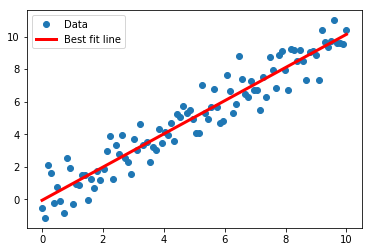

In [10]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()